In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

concat([df1,df2]) 等价于 df1.append(df2)

# 数据合并
- 数据合并的代码，耗时较久，已经完成执行并输出

In [2]:
# train_path = r"D:\dataset\智慧海洋\hy_round1_train_20200102\hy_round1_train_20200102"
# test_path = r"D:\dataset\智慧海洋\hy_round1_testA_20200102\hy_round1_testA_20200102"

# train_df = pd.DataFrame()
# len_train = len(os.listdir(train_path))
# for index, tp in enumerate(os.listdir(train_path)):
#     print("{}/{}".format(index+1, len_train))
#     file_path = os.path.join(train_path, tp)
#     df_read = pd.read_csv(file_path)
#     train_df = train_df.append(df_read)

# train_df.shape  # (2699638, 7)

# test_df = pd.DataFrame()
# len_test = len(os.listdir(test_path))
# for index, tp in enumerate(os.listdir(test_path)):
#     print("{}/{}".format(index+1, len_test))
#     file_path = os.path.join(test_path, tp)
#     df_read = pd.read_csv(file_path)
#     test_df = test_df.append(df_read)

# test_df.shape  # (782378, 6)

# train_df.to_csv(r"D:\dataset\智慧海洋\train.csv")
# test_df.to_csv(r"D:\dataset\智慧海洋\test.csv")

# 导入数据

In [3]:
train_df = pd.read_csv(r"D:\dataset\智慧海洋\train.csv")
print(train_df.shape)
train_df.head()

(2699638, 8)


,Unnamed: 0,渔船ID,x,y,速度,方向,time,type
0,0,0,6.152038e+06,5.124873e+06,2.59,102,1110 11:58:19,拖网
1,1,0,6.151230e+06,5.125218e+06,2.70,113,1110 11:48:19,拖网
2,2,0,6.150421e+06,5.125563e+06,2.70,116,1110 11:38:19,拖网
3,3,0,6.149612e+06,5.125907e+06,3.29,95,1110 11:28:19,拖网
4,4,0,6.148803e+06,5.126252e+06,3.18,108,1110 11:18:19,拖网


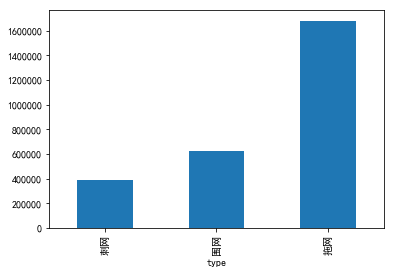

In [6]:
train_df.groupby("type")["type"].count().plot.bar()

In [5]:
test_df = pd.read_csv(r"D:\dataset\智慧海洋\test.csv")
print(test_df.shape)
test_df.head()

(782378, 7)


,Unnamed: 0,渔船ID,x,y,速度,方向,time
0,0,7000,7.118845e+06,5.918277e+06,0.11,0,1103 11:54:32
1,1,7000,7.118940e+06,5.918285e+06,0.32,346,1103 11:44:32
2,2,7000,7.118948e+06,5.918174e+06,0.11,0,1103 11:34:43
3,3,7000,7.118948e+06,5.918174e+06,0.11,71,1103 11:14:30
4,4,7000,7.118948e+06,5.918174e+06,0.11,30,1103 11:04:46


In [8]:
train_df["record"] = "train"
test_df["record"] = "test"

In [9]:
df = pd.concat([train_df, test_df], axis=0)
print(df.shape)
df.head()

d:\python_install\venv_set\py353\dataanalysiscase\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(3482016, 9)


,Unnamed: 0,record,time,type,x,y,方向,渔船ID,速度
0,0,train,1110 11:58:19,拖网,6.152038e+06,5.124873e+06,102,0,2.59
1,1,train,1110 11:48:19,拖网,6.151230e+06,5.125218e+06,113,0,2.70
2,2,train,1110 11:38:19,拖网,6.150421e+06,5.125563e+06,116,0,2.70
3,3,train,1110 11:28:19,拖网,6.149612e+06,5.125907e+06,95,0,3.29
4,4,train,1110 11:18:19,拖网,6.148803e+06,5.126252e+06,108,0,3.18


In [51]:
type_list = ["拖网", "围网", "刺网"]

In [45]:
# 生成箱线图
def draw_box(df_data, x_col, y_col=None):
    plt.subplots(figsize=(10, 6))
    if y_col:
        fig = sns.boxplot(x=df_data[y_col], y=x_col, data=df_data)
    else:
        fig = sns.boxplot(x=None, y=x_col, data=df_data)
    plt.xlabel(y_col, fontdict={'weight': 'normal', 'size': 24})
    plt.ylabel(x_col, fontdict={'weight': 'normal', 'size': 24})
    plt.yticks(size=18)
    plt.xticks(size=18)
    fig.axis()
    plt.show()

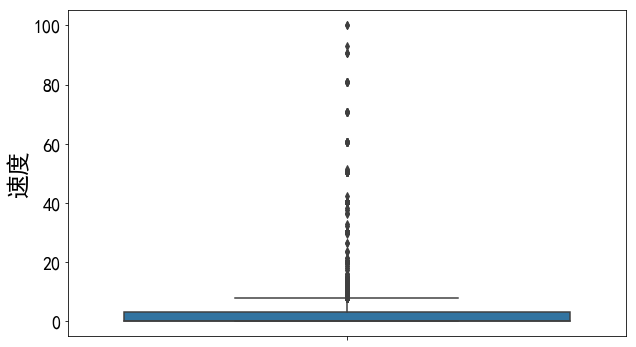

In [48]:
draw_box(df, x_col="速度", y_col=None)

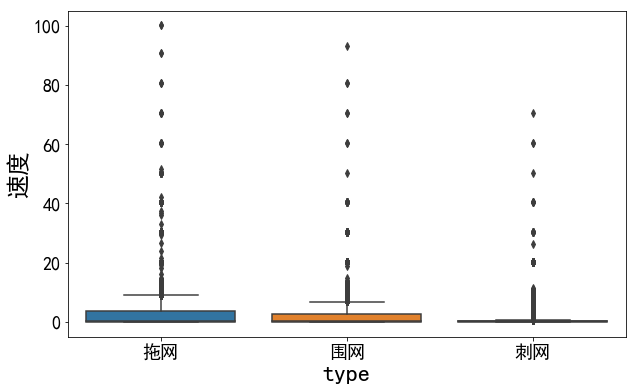

In [47]:
draw_box(df, x_col="速度", y_col="type")

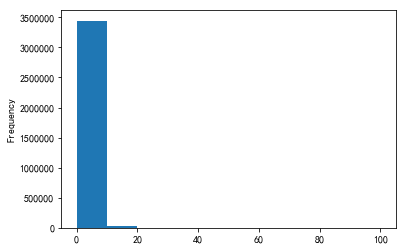

In [49]:
df["速度"].plot.hist()

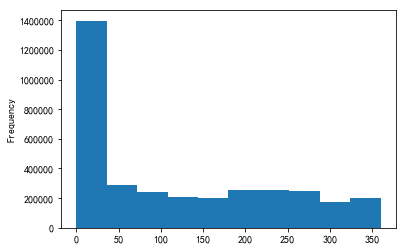

In [50]:
df["方向"].plot.hist()

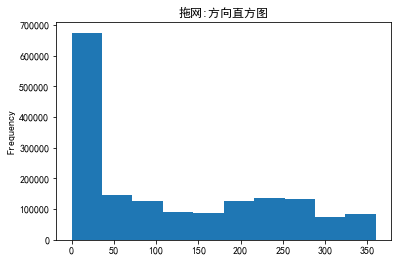

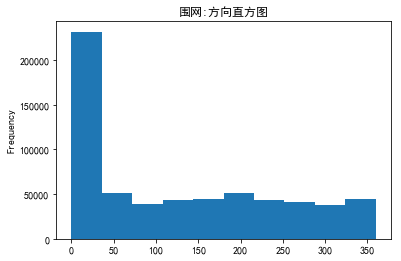

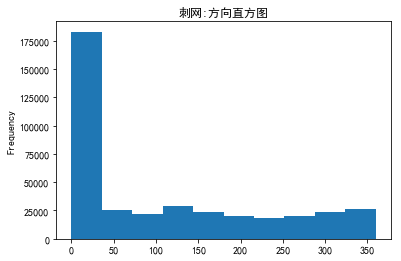

In [53]:
for tl in type_list:
    df[df["type"]==tl]["方向"].plot.hist(title="{}:方向直方图".format(tl))
    plt.show()

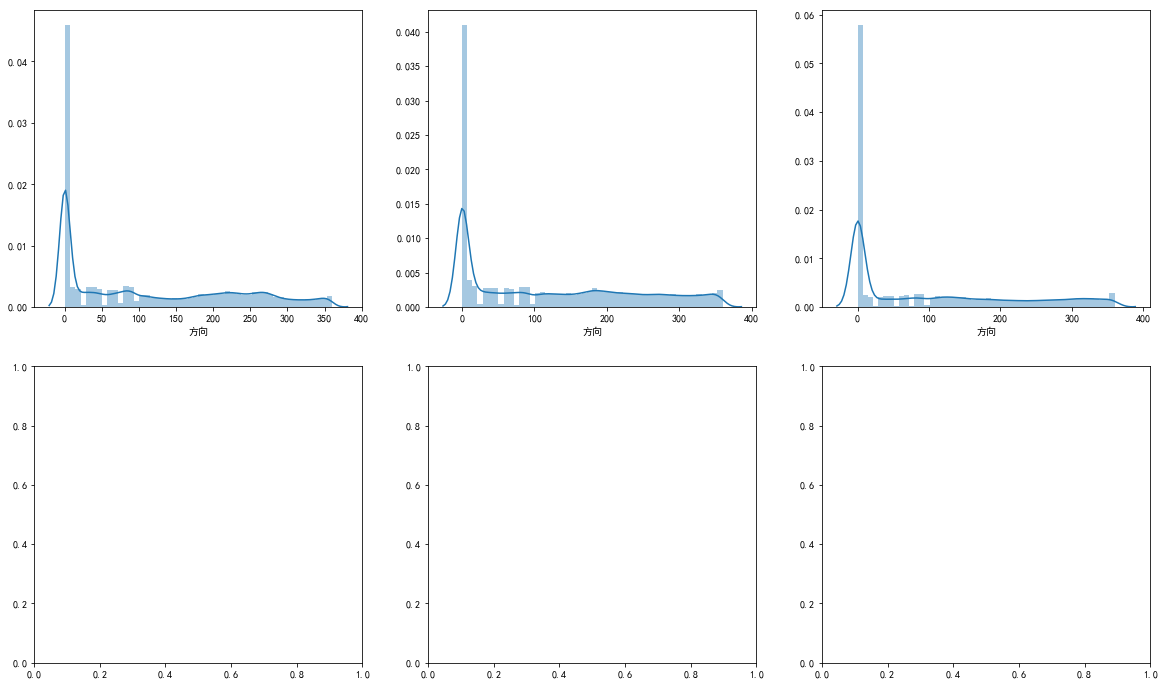

In [64]:
fig,axes = plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
for index, tl in enumerate(type_list):
    sns.distplot(df[df["type"]==tl]["方向"],ax=axes[0][index])